In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("trendyol_laptops_4934.csv")

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
# markaları alırken başlıklarla birlikte almışım. sadece marka olacak şekilde ayırdım.
df["Brand"]=df["Brand"].apply(lambda x:x.split(" ")[0])

In [5]:
df["Price"] = df["Price"].apply(lambda x : float(x.replace(".","").replace(",",".")))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Arttırılabilir Azami Bellek  326 non-null    object 
 1   Bağlantılar                  1457 non-null   object 
 2   Brand                        4934 non-null   object 
 3   Cihaz Ağırlığı               4934 non-null   object 
 4   Dokunmatik Ekran             4932 non-null   object 
 5   Ekran Boyutu                 4934 non-null   object 
 6   Ekran Kartı                  4934 non-null   object 
 7   Ekran Kartı Bellek Tipi      4932 non-null   object 
 8   Ekran Kartı Hafızası         4890 non-null   object 
 9   Ekran Kartı Tipi             4933 non-null   object 
 10  Ekran Yenileme Hızı          4666 non-null   object 
 11  Ekran Özelliği               154 non-null    object 
 12  Garanti Süresi               3950 non-null   object 
 13  Garanti Tipi      

In [7]:
df.drop(["Temel İşlemci Hızı (GHz)","Arttırılabilir Azami Bellek","Bağlantılar","Ekran Özelliği","Görüntü Kalitesi","HDMI","Kapasite","Maksimum İşlemci Hızı (GHz)","Okula Dönüş","Optik Sürücü","Panel Tipi","Soket Tipi","İşlemci Frekansı","Şarjlı Kullanım Süresi"],axis=1,inplace=True)

###  Çok fazla null değere sahip sütunları temizledim.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      4934 non-null   object 
 1   Cihaz Ağırlığı             4934 non-null   object 
 2   Dokunmatik Ekran           4932 non-null   object 
 3   Ekran Boyutu               4934 non-null   object 
 4   Ekran Kartı                4934 non-null   object 
 5   Ekran Kartı Bellek Tipi    4932 non-null   object 
 6   Ekran Kartı Hafızası       4890 non-null   object 
 7   Ekran Kartı Tipi           4933 non-null   object 
 8   Ekran Yenileme Hızı        4666 non-null   object 
 9   Garanti Süresi             3950 non-null   object 
 10  Garanti Tipi               4934 non-null   object 
 11  Hard Disk Kapasitesi       4672 non-null   object 
 12  Klavye                     4933 non-null   object 
 13  Kullanım Amacı             4934 non-null   objec

In [9]:
df["Brand"].value_counts()

LENOVO          2181
ASUS             833
HP               640
Dell             539
ACER             198
MSI              121
Apple            106
Casper            93
Monster           56
Huawei            22
Toshiba           22
Game              21
Everest           13
Hometech          11
Dynabook           9
Gigabyte           8
Technopc           7
Shenzhen           7
Microsoft          7
İXTECH             6
Honor              5
DEL                4
I-LIFE             4
Dahua              3
Life               3
FUJITSU            2
HADRON             2
EVOO               2
Excalibur          1
Thomson            1
Intel              1
ILIFE              1
toystower          1
FSFBOOK            1
Sorbibilisim       1
sorbi              1
Xi-Sirius          1
Name: Brand, dtype: int64

###  100 taneden az sayıdaki marka isimlerini veri setimizden kaldırdık.

In [10]:
mask = (df["Brand"] == "LENOVO") | (df["Brand"] == "ASUS") | (df["Brand"] == "HP") | (df["Brand"] == "Dell") | (df["Brand"] == "ACER")  | (df["Brand"] == "MSI") | (df["Brand"] == "Apple") 
new_df = df[mask]

In [11]:
new_df.reset_index(inplace=True)

In [12]:
new_df.drop(["index"],axis=1,inplace=True)

C:\Users\MERVE\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
new_df.reset_index(inplace=True)

In [14]:
new_df

,index,Brand,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Yenileme Hızı,...,SSD Kapasitesi,Star,Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi
0,0,Apple,Belirtilmemiş,Yok,13 inç,M1 7 Çekirdekli,Belirtilmemiş,Paylaşımlı,Dahili,Belirtilmemiş,...,256 GB,4.84,Macbook Air 13'' M1 8gb 256gb Ssd Uzay Grisi ...,2560 x 1600,Retina,Belirtilmemiş,Belirtilmemiş,Apple M1,8,Mac Os
1,1,LENOVO,2 kg ve Altı,Yok,14 inç,Intel UHD Graphics 600,DDR4,Paylaşımlı,Dahili,Belirtilmemiş,...,128 GB,4.25,"Ideapad Intel Celeron N4020 4GB 128GB SSD 14""...",1366 x 768,HD Ready (HD),N4020,Belirtilmemiş,Intel Celeron,2,Free Dos
2,2,LENOVO,4 kg ve Üstü,Yok,16 inç,Nvidia GeForce RTX 3050 Ti,GDDR6,4 GB,Harici,165 Hz,...,512 GB,4.36,Ideapad Gaming 3 82sc0062tx Amd Ryzen5 6600h ...,Belirtilmemiş,WUXGA,6600H,6. Nesil,AMD Ryzen 5,6,Free Dos
3,3,ASUS,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce GTX 1650,GDDR6,4 GB,Harici,144 Hz,...,512 GB,4.74,Tuf Gamıng A15 Fx506lhb-hn347 Intel I5-10300h...,1920 x 1080,Full HD (FHD),10300H,Belirtilmemiş,Intel Core i5,4,Free Dos
4,4,LENOVO,2 - 4 kg,Var,"15,6 inç",Belirtilmemiş,Belirtilmemiş,Paylaşımlı,Dahili,Belirtilmemiş,...,128 GB,4.60,Yoga C630 Intel Core I5 8250u 8gb 128gb Ssd C...,1920 x 1080,Full HD (FHD),8250U,8. Nesil,Intel Core i5,Belirtilmemiş,Chrome OS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,4613,Dell,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,4 GB,Harici,120 Hz,...,512 GB,0.00,G15 5511 G55112306u08 I5-11260h 64gb 512ssd R...,1920 x 1080,Full HD (FHD),11260H,11. Nesil,Intel Core i5,6,Windows
4614,4614,Dell,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,4 GB,Harici,120 Hz,...,512 GB,0.00,G15 5511 G55112306u02 I5-11260h 32gb 512ssd R...,1920 x 1080,Full HD (FHD),11260H,11. Nesil,Intel Core i5,6,Free Dos
4615,4615,Dell,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,4 GB,Harici,120 Hz,...,1 TB,0.00,G15 5511 G55112306u01 I5-11260h 16gb 1tbssd R...,1920 x 1080,Full HD (FHD),11260H,11. Nesil,Intel Core i5,6,Free Dos
4616,4616,Dell,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,4 GB,Harici,120 Hz,...,512 GB,0.00,G15 5511 G55112306u I5-11260h 16gb 512ssd Rtx...,1920 x 1080,Full HD (FHD),11260H,11. Nesil,Intel Core i5,6,Free Dos


In [15]:
new_df["Cihaz Ağırlığı"].value_counts()

2 kg ve Altı     2168
2 - 4 kg         1901
Belirtilmemiş     540
4 kg ve Üstü        9
Name: Cihaz Ağırlığı, dtype: int64

In [16]:
new_df["Cihaz Ağırlığı"] = new_df["Cihaz Ağırlığı"].apply(lambda x: 3 if x == "2 kg ve Altı" else(2 if x == "2 - 4 kg" else (1 if x == "4 kg ve Üstü" else np.NaN)))

<ipython-input-16-c0b2430d7a0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Cihaz Ağırlığı"] = new_df["Cihaz Ağırlığı"].apply(lambda x: 3 if x == "2 kg ve Altı" else(2 if x == "2 - 4 kg" else (1 if x == "4 kg ve Üstü" else np.NaN)))


In [17]:
new_df["Cihaz Ağırlığı"].value_counts()

3.0    2168
2.0    1901
1.0       9
Name: Cihaz Ağırlığı, dtype: int64

In [18]:
new_df["Dokunmatik Ekran"].value_counts()

Yok    4413
Var     205
Name: Dokunmatik Ekran, dtype: int64

In [19]:
new_df["Dokunmatik Ekran"] = new_df["Dokunmatik Ekran"].apply(lambda x: 1 if x=="Var" else 0)

<ipython-input-19-edcb41c46297>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Dokunmatik Ekran"] = new_df["Dokunmatik Ekran"].apply(lambda x: 1 if x=="Var" else 0)


In [20]:
new_df["Dokunmatik Ekran"].value_counts()

0    4413
1     205
Name: Dokunmatik Ekran, dtype: int64

In [21]:
new_df["Ekran Boyutu"].value_counts()

15,6 inç         2945
14 inç            921
17,3 inç          342
16 inç            105
13,3 inç           90
Belirtilmemiş      45
13 inç             30
16,1 inç           29
17 inç             27
13,6 inç           23
15 inç             18
13,4 inç           11
10 inç              8
10,6 inç            5
11,6 inç            5
14,1 inç            3
14,5 inç            2
15,4 inç            2
12 inç              2
14,2 inç            2
10,1 inç            1
11 inç              1
10,5 inç            1
Name: Ekran Boyutu, dtype: int64

In [22]:
new_df["Ekran Boyutu"] = new_df["Ekran Boyutu"].apply(lambda x: np.nan if x=="Belirtilmemiş" else float(x.split(" ")[0].replace(",",".")))

<ipython-input-22-153de3882a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Ekran Boyutu"] = new_df["Ekran Boyutu"].apply(lambda x: np.nan if x=="Belirtilmemiş" else float(x.split(" ")[0].replace(",",".")))


In [23]:
new_df["Ekran Boyutu"].value_counts()

15.6    2945
14.0     921
17.3     342
16.0     105
13.3      90
13.0      30
16.1      29
17.0      27
13.6      23
15.0      18
13.4      11
10.0       8
10.6       5
11.6       5
14.1       3
15.4       2
14.5       2
14.2       2
12.0       2
10.1       1
10.5       1
11.0       1
Name: Ekran Boyutu, dtype: int64

In [24]:
new_df["Ekran Kartı"].value_counts()

Dahili Ekran Kartı              472
Intel Iris Graphics             446
Nvidia GeForce MX450            434
Nvidia RTX A2000                356
Nvidia GeForce RTX3060          292
                               ... 
AMD Radeon Vega 10                1
Nvidia Quadro P2200               1
Intel Iris Plus Graphics 645      1
Nvidia GeForce MX150              1
Nvidia RTX A5000                  1
Name: Ekran Kartı, Length: 94, dtype: int64

In [25]:
### dön düzenle
# new_df["Ekran Kartı_Puan"] = 
# ekran_kartlari = {'Nvidia GeForce GTX 1650':28, 'Intel Iris Graphics':4.5,
#        'Nvidia GeForce RTX3060':60, 'Nvidia GeForce RTX 3050 Ti':60,'M1 7 Çekirdekli':12,
#        'Nvidia GeForce RTX 3050': 40, 'M2 8 Çekirdekli':40, 'Intel UHD Graphics':5,
#        'AMD Radeon Graphics':10 , 'AMD Radeon R5':8, 
#        'Dahili Ekran Kartı':4, 
#        'AMD Radeon R7':10,
#        'Belirtilmemiş':4, 
#         'Paylaşımlı':4, 
#           'Intel Iris Pro Graphics':10,'Intel UHD Graphics 600':10,
#             'M1 Pro 14 Çekirdekli': 80, 
#         'AMD Radeon R3':4,'AMD':4,
#            'Nvidia GeForce MX130':4,'Nvidia GeForce MX550':4,'Intel HD Graphics 515':4,
#         'Nvidia GeForce RTX 3080':93, 'Nvidia GeForce MX330':4, 'M2 10 Çekirdekli':100,
#        'Nvidia GeForce MX350':10, 'Nvidia GeForce RTX 3070':45,
#        'Intel HD Graphics':5, 'Intel HD 620':5, 
#        'Nvidia GeForce MX150':10, 'Nvidia GeForce RTX 3080 Ti': 98,
#        'Nvidia GeForce RTX 3070Ti':82, 'AMD Radeon Pro 5500M':18,
#        'Nvidia GeForce GTX1650 Ti':25,
#        'Nvidia GeForce RTX 3070 Max-Q':80, }

In [26]:
new_df["Ekran Kartı Bellek Tipi"].value_counts()

GDDR6            2217
Belirtilmemiş     930
GDDR5             495
DDR4              385
SD                343
DDR               125
DDR5               74
DDR3               24
DDR2                6
GDDR4               6
DDR2 + DDR3         5
HBM2                4
GDDR5X              2
GDDR6X              2
Name: Ekran Kartı Bellek Tipi, dtype: int64

# <font color="red"> Ekran hafızasına ve ekran yenileme hızına tekrar bak

In [27]:
new_df["Ekran Kartı Hafızası"].value_counts() 

Paylaşımlı      1649
4 GB            1409
2 GB             765
6 GB             417
8 GB             239
16 GB             32
3 GB              13
Paylaşımsız       13
12 GB             11
4 GB ve altı      11
10 GB             10
1 GB               9
32 GB              2
Name: Ekran Kartı Hafızası, dtype: int64

In [30]:
new_df['Ekran Kartı Hafızası']= new_df['Ekran Kartı Hafızası'].str.replace(" GB","")
new_df["Ekran Kartı Hafızası"] = new_df["Ekran Kartı Hafızası"].replace("Paylaşımlı",0)
new_df["Ekran Kartı Hafızası"] = new_df["Ekran Kartı Hafızası"].replace(["Paylaşımsız","4 ve altı"],np.NaN)
new_df["Ekran Kartı Hafızası"] = new_df["Ekran Kartı Hafızası"].astype(float)
# new_df["Ekran Kartı Hafızası"] = new_df["Ekran Kartı Hafızası"].apply(lambda x: 0 if x == "Paylaşımlı" else (np.NaN if (x == "Paylaşımsız" or x == "4 GB ve altı") else (int(x.split(" ")[0]) if isinstance(x,str))))

<ipython-input-30-72137e49cae0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Ekran Kartı Hafızası']= new_df['Ekran Kartı Hafızası'].str.replace(" GB","")
<ipython-input-30-72137e49cae0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Ekran Kartı Hafızası"] = new_df["Ekran Kartı Hafızası"].replace("Paylaşımlı",0)
<ipython-input-30-72137e49cae0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [31]:
new_df["Ekran Kartı Hafızası"].value_counts() 

4.0     1409
2.0      765
6.0      417
8.0      239
16.0      32
3.0       13
12.0      11
10.0      10
1.0        9
32.0       2
Name: Ekran Kartı Hafızası, dtype: int64

In [32]:
new_df["Ekran Yenileme Hızı"].value_counts() 

Belirtilmemiş    2829
60 Hz             686
144 Hz            385
Yok               175
165 Hz            146
120 Hz            129
360 Hz             18
90 Hz              17
240 Hz             12
300 Hz              7
Name: Ekran Yenileme Hızı, dtype: int64

In [ ]:
# for ix,memory in enumerate(new_df["Ekran Yenileme Hızı"]):
#     if memory == "Belirtilmemiş" or memory == "Yok":
#         new_df["Ekran Yenileme Hızı"].iloc[ix] = np.nan;
#     elif isinstance(memory,str):
#         new_df["Ekran Yenileme Hızı"].iloc[ix] = int(memory.split(" ")[0]);
#     else:
#         pass;

In [ ]:
# new_df["Ekran Yenileme Hızı"].value_counts() 

In [33]:
new_df["Garanti Süresi"].value_counts()

2 Yıl    2784
3 Yıl     936
1 Yıl       7
Name: Garanti Süresi, dtype: int64

In [34]:
new_df["Garanti Süresi"].unique()

array(['2 Yıl', nan, '1 Yıl', '3 Yıl'], dtype=object)

In [35]:
new_df["Garanti Süresi"] = new_df["Garanti Süresi"].str.replace(" Yıl","")
new_df["Garanti Süresi"] = new_df["Garanti Süresi"].astype(float)

<ipython-input-35-c6f70970266a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Garanti Süresi"] = new_df["Garanti Süresi"].str.replace(" Yıl","")
<ipython-input-35-c6f70970266a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Garanti Süresi"] = new_df["Garanti Süresi"].astype(float)


In [36]:
new_df["Garanti Süresi"].value_counts()

2.0    2784
3.0     936
1.0       7
Name: Garanti Süresi, dtype: int64

In [37]:
marka_garantili = ['Asus Türkiye Garantili',
       'Lenovo Türkiye Garantili', 'Dell Türkiye Garantili',
       'ACER Türkiye Garantili', 'Apple Türkiye Garantili',
       'MSI Türkiye Garantili', 'HP Türkiye Garantili', 'Casper Türkiye Garantili',
       'Samsung TR Garantili']

new_df["Garanti Tipi"] = new_df["Garanti Tipi"].replace(marka_garantili,"Marka Grantili")

<ipython-input-37-86bee1bac976>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Garanti Tipi"] = new_df["Garanti Tipi"].replace(marka_garantili,"Marka Grantili")


In [38]:
new_df["Garanti Tipi"].unique()

array(['Resmi Distribütör Garantili', 'Marka Grantili',
       'İthalatçı Garantili'], dtype=object)

In [39]:
new_df["Hard Disk Kapasitesi"].value_counts()

HDD Yok    3220
Yok         720
1 TB        238
512 GB       73
256 GB       61
500 GB       37
250 GB       24
2 TB         14
128 GB       13
32 GB         7
4 TB          1
Name: Hard Disk Kapasitesi, dtype: int64

In [40]:
new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].replace(["HDD Yok","Yok"],0)
new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].str.replace(" GB","")
new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].str.replace(" TB","")
new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].astype(float)
new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].replace([1,2,4],[1024,2*1024,4*1024])

<ipython-input-40-61475941a693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].replace(["HDD Yok","Yok"],0)
<ipython-input-40-61475941a693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Hard Disk Kapasitesi"] = new_df["Hard Disk Kapasitesi"].str.replace(" GB","")
<ipython-input-40-61475941a693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [41]:
new_df["Hard Disk Kapasitesi"].value_counts()

1024.0    238
512.0      73
256.0      61
500.0      37
250.0      24
2048.0     14
128.0      13
32.0        7
4096.0      1
Name: Hard Disk Kapasitesi, dtype: int64

In [42]:
new_df.drop(["Klavye"],axis=1,inplace=True)

C:\Users\MERVE\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
new_df.reset_index(inplace=True)

In [44]:
new_df["Kullanım Amacı"].unique()

array(['Ev - Okul', 'Oyun', 'Ofis - İş', 'Tasarım'], dtype=object)

In [45]:
new_df["Optik Sürücü Tipi"].unique()

array(['Yok', 'Çoklu Kopyalama Sistemleri', nan, 'DVD RW', 'DVD Yazıcı',
       'Blu-Ray Okuyucu', 'DVD Okuyucu', 'DVD Dual Yazıcı',
       'DVD Super Multi'], dtype=object)

In [46]:
new_df.drop(["Optik Sürücü Tipi"],axis=1,inplace=True)

In [47]:
new_df.drop(["level_0","index"],axis=1,inplace=True)

In [48]:
new_df.reset_index(inplace=True)

In [49]:
new_df["Ram (Sistem Belleği)"].unique()

array(['8 GB', '4 GB', '16 GB', '1 GB', '32 GB', '12 GB', '64 GB',
       '24 GB', '20 GB', '48 GB', '3 GB', '128 GB', '40 GB', '36 GB'],
      dtype=object)

In [50]:
new_df["Ram (Sistem Belleği)"] = new_df["Ram (Sistem Belleği)"].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-50-7cc64591a2d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Ram (Sistem Belleği)"] = new_df["Ram (Sistem Belleği)"].apply(lambda x: int(x.split(" ")[0]))


In [51]:
new_df["Ram (Sistem Belleği) Tipi"].unique()

array(['Belirtilmemiş', 'DDR4', 'DDR5', nan, 'DDR6', 'LPDDR4', 'LPDDR4X',
       'LPDDR5', 'DDR2', 'DDR3', 'LPDDR3', 'DDR1'], dtype=object)

In [52]:
new_df["Ram (Sistem Belleği) Tipi"]=new_df["Ram (Sistem Belleği) Tipi"].replace(["DDR1",'DDR2',"DDR3",'DDR4','LPDDR3','LPDDR4','LPDDR4X','DDR5','LPDDR5','DDR6',"Belirtilmemiş",np.NaN],[1,2,3,4,5,6,7,8,9,10,3,3])
new_df["Ram (Sistem Belleği) Tipi"].unique()

<ipython-input-52-fe8eb4249e3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Ram (Sistem Belleği) Tipi"]=new_df["Ram (Sistem Belleği) Tipi"].replace(["DDR1",'DDR2',"DDR3",'DDR4','LPDDR3','LPDDR4','LPDDR4X','DDR5','LPDDR5','DDR6',"Belirtilmemiş",np.NaN],[1,2,3,4,5,6,7,8,9,10,3,3])


array([ 3,  4,  8, 10,  6,  7,  9,  2,  5,  1], dtype=int64)

In [53]:
new_df.drop(["Renk"],axis=1,inplace=True)

In [54]:
new_df.reset_index(inplace=True)

In [55]:
new_df["SSD Kapasitesi"].value_counts()

512 GB     1635
1 TB       1050
256 GB      836
2 TB        623
SSD Yok     131
500 GB      127
128 GB      101
Yok          26
250 GB       26
240 GB       20
4 TB         12
120 GB       12
8 GB         11
480 GB        6
64 GB         2
Name: SSD Kapasitesi, dtype: int64

In [56]:
new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].replace(["SSD Yok","Yok"],0)
new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].str.replace(" GB","")
new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].str.replace(" TB","")
new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].astype(float)
new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].replace([1,2,4],[1024,2*1024,4*1024])

<ipython-input-56-ee8ef22df9d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].replace(["SSD Yok","Yok"],0)
<ipython-input-56-ee8ef22df9d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["SSD Kapasitesi"] = new_df["SSD Kapasitesi"].str.replace(" GB","")
<ipython-input-56-ee8ef22df9d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [57]:
new_df["Çözünürlük"].value_counts()

1920 x 1080      3888
1366 x 768        207
1920 x 1200       136
2560 x 1600        83
2560 x 1440        67
3840 x 2400        57
3840 x 2160        36
2880 x 1800        26
1280 x 800         23
3072 x 1920        18
2160 x 1440        11
2560 x 1664        10
Belirtilmemiş       8
1440 x 900          7
3456 x 2234         7
2340 x 1440         6
1600 x 900          6
3456 x 2160         6
2880 x 1620         4
3024 x 1964         3
2550 x 1600         3
4096 x 2160         2
3200 x 1800         1
4480 x 2520         1
1920 x 1280         1
1024 x 768          1
Name: Çözünürlük, dtype: int64

In [58]:
res_sort = sorted(new_df["Çözünürlük"].unique())
index = 0
for res in new_df["Çözünürlük"]:
    if res == "Belirtilmemiş":
        new_df["Çözünürlük"].iloc[index] = np.nan
    else:
        new_df["Çözünürlük"].iloc[index] = int(res[0])
    index += 1

C:\Users\MERVE\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-58-cb40a429d2a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Çözünürlük"].iloc[index] = int(res[0])
<ipython-input-58-cb40a429d2a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Çözünürlük"].iloc[index] = np.nan


In [102]:
new_df["Çözünürlük"] = new_df["Çözünürlük"].astype(float)

<ipython-input-102-b46abab17124>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Çözünürlük"] = new_df["Çözünürlük"].astype(float)


In [59]:
new_df["Çözünürlük"].value_counts()

1    4269
2     210
3     128
4       3
Name: Çözünürlük, dtype: int64

In [60]:
new_df["Çözünürlük Standartı"].unique()

array(['Retina', 'HD Ready (HD)', 'WUXGA', 'Full HD (FHD)',
       'Ultra HD 4K (UHD)', 'QHD', 'Full HD Ultra Wide', 'FHD+', 'WQHD',
       'WQXGA', nan], dtype=object)

In [61]:
new_df['Çözünürlük Standartı'] = new_df['Çözünürlük Standartı'].replace(['Full HD (FHD)',"FHD+","WUXGA",'HD Ready (HD)',
                                                               'Retina','Ultra HD 4K (UHD)','WQHD','QHD','Full HD Ultra Wide','WQXGA'],
                                                              [2,2,2,1,4,4,3,3,3,2])

<ipython-input-61-70b4374f334e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Çözünürlük Standartı'] = new_df['Çözünürlük Standartı'].replace(['Full HD (FHD)',"FHD+","WUXGA",'HD Ready (HD)',


In [62]:
new_df["Çözünürlük Standartı"].unique()

array([ 4.,  1.,  2.,  3., nan])

In [63]:
new_df["İşlemci Modeli"].unique()

array(['Belirtilmemiş', 'N4020', '6600H', '10300H', '8250U', '3500U',
       '5600H', '11500', '1135G7', '3250U', '5300U', '5625U', '1235U',
       'N4120', '11260H', '4800H', '5500U', '5700U', '1005G1', '6800H',
       '11400', '6305', '4600H', '5800H', '12650H', 'N4000', '11800H',
       '1165G7', '12700H', '1115G4', '9980HK', '1260p', '11370H',
       '11400H', '2600', '12500H', '12900HX', '10110U', '1035G4',
       '1035G1', 'N5000', '1065G7', '6800HS', '1280P', '3020e', '1255U',
       '11300H', 'i5 10400', '8565U', '3150U', '12900H', '9425', '11600H',
       'i7-11370H', '11375H', 'M5Y71', '10500H', '9300H', '11950H',
       '10210U', '4500U', '12800HX', '6900HX', 'i3-1115G4', 'i5-1135G7',
       '1000M', '10870H', 'Ryzen 3 3250U', '2200', '9850H', 'i5-10310U',
       '3200U', '5900HX', '11900H', '10885H', 'AMD Ryzen 7 5800H',
       '10400', '10750H', '3700U', '11390H', '1195G7', '9225', '5200',
       '5800HS', 'Ryzen 5 5600', 'i5-11320H', '3550H', '1185G7', '4700U',
       '56

In [64]:
new_df.drop("İşlemci Modeli",axis=1,inplace=True)

In [65]:
new_df.drop("level_0",axis=1,inplace=True)

In [66]:
new_df.reset_index(inplace=True)

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   level_0                    4618 non-null   int64  
 1   index                      4618 non-null   int64  
 2   Brand                      4618 non-null   object 
 3   Cihaz Ağırlığı             4078 non-null   float64
 4   Dokunmatik Ekran           4618 non-null   int64  
 5   Ekran Boyutu               4573 non-null   float64
 6   Ekran Kartı                4618 non-null   object 
 7   Ekran Kartı Bellek Tipi    4618 non-null   object 
 8   Ekran Kartı Hafızası       2907 non-null   float64
 9   Ekran Kartı Tipi           4618 non-null   object 
 10  Ekran Yenileme Hızı        4404 non-null   object 
 11  Garanti Süresi             3727 non-null   float64
 12  Garanti Tipi               4618 non-null   object 
 13  Hard Disk Kapasitesi       468 non-null    float

In [68]:
new_df["İşlemci Nesli"].value_counts()

11. Nesil        2273
12. Nesil         641
10. Nesil         466
Belirtilmemiş     312
5. Nesil          282
6. Nesil          125
4. Nesil          106
Ryzen              87
Yok                85
3. Nesil           53
1. Nesil           38
8. Nesil           24
7. Nesil           13
2. Nesil           11
9. Nesil           11
Name: İşlemci Nesli, dtype: int64

# işlemci nesli düzenle

In [69]:
# tipler=['AMD E', 'AMD A9','AMD A4', 'AMD', 'AMD Athlon']
# for ix, tip in (new_df[new_df["İşlemci Nesli"]=="Ryzen"]["İşlemci Tipi"]):
#     print(ix)
# #     if tip in tipler:
# #         new_df["İşlemci Nesli"].iloc[ix] = "1. Nesil"
# #     else:
# #         new_df["İşlemci Nesli"].iloc[ix] = tip[-1] + ". Nesil"

In [70]:
new_df["İşlemci Çekirdek Sayısı"].value_counts()

8                1402
4                1366
Belirtilmemiş     610
10                309
6                 277
2                 249
14                155
12                 76
1                  40
16                 20
Name: İşlemci Çekirdek Sayısı, dtype: int64

In [71]:
new_df["İşlemci Çekirdek Sayısı"].unique()

array(['8', '2', '6', '4', 'Belirtilmemiş', '16', '10', nan, '1', '12',
       '14'], dtype=object)

In [72]:
new_df["İşlemci Çekirdek Sayısı"] = new_df["İşlemci Çekirdek Sayısı"].replace("Belirtilmemiş",np.NaN)
new_df["İşlemci Çekirdek Sayısı"] = new_df["İşlemci Çekirdek Sayısı"].astype(float)

<ipython-input-72-d92e72f51ff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["İşlemci Çekirdek Sayısı"] = new_df["İşlemci Çekirdek Sayısı"].replace("Belirtilmemiş",np.NaN)
<ipython-input-72-d92e72f51ff6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["İşlemci Çekirdek Sayısı"] = new_df["İşlemci Çekirdek Sayısı"].astype(float)


In [73]:
new_df["İşlemci Çekirdek Sayısı"].value_counts()

8.0     1402
4.0     1366
10.0     309
6.0      277
2.0      249
14.0     155
12.0      76
1.0       40
16.0      20
Name: İşlemci Çekirdek Sayısı, dtype: int64

In [74]:
new_df["İşlemci Çekirdek Sayısı"].value_counts()

8.0     1402
4.0     1366
10.0     309
6.0      277
2.0      249
14.0     155
12.0      76
1.0       40
16.0      20
Name: İşlemci Çekirdek Sayısı, dtype: int64

In [75]:
new_df["İşletim Sistemi"].value_counts()

Windows       2797
Free Dos      1535
Mac Os         105
Windows 11      74
Linux           48
Ubuntu          46
Android          8
Chrome OS        5
Name: İşletim Sistemi, dtype: int64

In [76]:
new_df["İşletim Sistemi"] = new_df["İşletim Sistemi"].replace(["Linux","Android","Ubuntu","Chrome OS"],"Diğer")

<ipython-input-76-50d7599dc930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["İşletim Sistemi"] = new_df["İşletim Sistemi"].replace(["Linux","Android","Ubuntu","Chrome OS"],"Diğer")


In [77]:
new_df["İşletim Sistemi"].value_counts()

Windows       2797
Free Dos      1535
Diğer          107
Mac Os         105
Windows 11      74
Name: İşletim Sistemi, dtype: int64

In [78]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   level_0                    4618 non-null   int64  
 1   index                      4618 non-null   int64  
 2   Brand                      4618 non-null   object 
 3   Cihaz Ağırlığı             4078 non-null   float64
 4   Dokunmatik Ekran           4618 non-null   int64  
 5   Ekran Boyutu               4573 non-null   float64
 6   Ekran Kartı                4618 non-null   object 
 7   Ekran Kartı Bellek Tipi    4618 non-null   object 
 8   Ekran Kartı Hafızası       2907 non-null   float64
 9   Ekran Kartı Tipi           4618 non-null   object 
 10  Ekran Yenileme Hızı        4404 non-null   object 
 11  Garanti Süresi             3727 non-null   float64
 12  Garanti Tipi               4618 non-null   object 
 13  Hard Disk Kapasitesi       468 non-null    float

In [79]:
new_df.drop(["level_0","index"],axis=1,inplace=True)

In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      4618 non-null   object 
 1   Cihaz Ağırlığı             4078 non-null   float64
 2   Dokunmatik Ekran           4618 non-null   int64  
 3   Ekran Boyutu               4573 non-null   float64
 4   Ekran Kartı                4618 non-null   object 
 5   Ekran Kartı Bellek Tipi    4618 non-null   object 
 6   Ekran Kartı Hafızası       2907 non-null   float64
 7   Ekran Kartı Tipi           4618 non-null   object 
 8   Ekran Yenileme Hızı        4404 non-null   object 
 9   Garanti Süresi             3727 non-null   float64
 10  Garanti Tipi               4618 non-null   object 
 11  Hard Disk Kapasitesi       468 non-null    float64
 12  Kullanım Amacı             4618 non-null   object 
 13  Price                      4618 non-null   float

In [81]:
new_df.drop("Hard Disk Kapasitesi",inplace=True,axis=1)

In [86]:
new_df.reset_index(inplace=True)

In [87]:
new_df.drop("index",inplace=True,axis=1)

C:\Users\MERVE\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
new_df.drop("level_0",inplace=True,axis=1)

C:\Users\MERVE\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      4618 non-null   object 
 1   Cihaz Ağırlığı             4078 non-null   float64
 2   Dokunmatik Ekran           4618 non-null   int64  
 3   Ekran Boyutu               4573 non-null   float64
 4   Ekran Kartı                4618 non-null   object 
 5   Ekran Kartı Bellek Tipi    4618 non-null   object 
 6   Ekran Kartı Hafızası       2907 non-null   float64
 7   Ekran Kartı Tipi           4618 non-null   object 
 8   Ekran Yenileme Hızı        4404 non-null   object 
 9   Garanti Süresi             3727 non-null   float64
 10  Garanti Tipi               4618 non-null   object 
 11  Kullanım Amacı             4618 non-null   object 
 12  Price                      4618 non-null   float64
 13  Ram (Sistem Belleği)       4618 non-null   int64

In [90]:
new_df

,Brand,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Yenileme Hızı,Garanti Süresi,...,Ram (Sistem Belleği) Tipi,SSD Kapasitesi,Star,Title,Çözünürlük,Çözünürlük Standartı,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi
0,Apple,NaN,0,13.0,M1 7 Çekirdekli,Belirtilmemiş,NaN,Dahili,Belirtilmemiş,2.0,...,3,256.0,4.84,Macbook Air 13'' M1 8gb 256gb Ssd Uzay Grisi ...,2,4.0,Belirtilmemiş,Apple M1,8.0,Mac Os
1,LENOVO,3.0,0,14.0,Intel UHD Graphics 600,DDR4,NaN,Dahili,Belirtilmemiş,2.0,...,4,128.0,4.25,"Ideapad Intel Celeron N4020 4GB 128GB SSD 14""...",1,1.0,Belirtilmemiş,Intel Celeron,2.0,Free Dos
2,LENOVO,1.0,0,16.0,Nvidia GeForce RTX 3050 Ti,GDDR6,4.0,Harici,165 Hz,2.0,...,8,512.0,4.36,Ideapad Gaming 3 82sc0062tx Amd Ryzen5 6600h ...,NaN,2.0,6. Nesil,AMD Ryzen 5,6.0,Free Dos
3,ASUS,2.0,0,15.6,Nvidia GeForce GTX 1650,GDDR6,4.0,Harici,144 Hz,2.0,...,4,512.0,4.74,Tuf Gamıng A15 Fx506lhb-hn347 Intel I5-10300h...,1,2.0,Belirtilmemiş,Intel Core i5,4.0,Free Dos
4,LENOVO,2.0,1,15.6,Belirtilmemiş,Belirtilmemiş,NaN,Dahili,Belirtilmemiş,2.0,...,3,128.0,4.60,Yoga C630 Intel Core I5 8250u 8gb 128gb Ssd C...,1,2.0,8. Nesil,Intel Core i5,NaN,Diğer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,Dell,2.0,0,15.6,Nvidia GeForce RTX 3050,GDDR6,4.0,Harici,120 Hz,2.0,...,4,512.0,0.00,G15 5511 G55112306u08 I5-11260h 64gb 512ssd R...,1,2.0,11. Nesil,Intel Core i5,6.0,Windows
4614,Dell,2.0,0,15.6,Nvidia GeForce RTX 3050,GDDR6,4.0,Harici,120 Hz,2.0,...,4,512.0,0.00,G15 5511 G55112306u02 I5-11260h 32gb 512ssd R...,1,2.0,11. Nesil,Intel Core i5,6.0,Free Dos
4615,Dell,2.0,0,15.6,Nvidia GeForce RTX 3050,GDDR6,4.0,Harici,120 Hz,2.0,...,4,1024.0,0.00,G15 5511 G55112306u01 I5-11260h 16gb 1tbssd R...,1,2.0,11. Nesil,Intel Core i5,6.0,Free Dos
4616,Dell,2.0,0,15.6,Nvidia GeForce RTX 3050,GDDR6,4.0,Harici,120 Hz,2.0,...,4,512.0,0.00,G15 5511 G55112306u I5-11260h 16gb 512ssd Rtx...,1,2.0,11. Nesil,Intel Core i5,6.0,Free Dos


In [93]:
new_df.dropna(inplace = True)

<ipython-input-93-6b34463e2f37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace = True)


In [103]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 3 to 4617
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      1818 non-null   object 
 1   Cihaz Ağırlığı             1818 non-null   float64
 2   Dokunmatik Ekran           1818 non-null   int64  
 3   Ekran Boyutu               1818 non-null   float64
 4   Ekran Kartı                1818 non-null   object 
 5   Ekran Kartı Bellek Tipi    1818 non-null   object 
 6   Ekran Kartı Hafızası       1818 non-null   float64
 7   Ekran Kartı Tipi           1818 non-null   object 
 8   Ekran Yenileme Hızı        1818 non-null   object 
 9   Garanti Süresi             1818 non-null   float64
 10  Garanti Tipi               1818 non-null   object 
 11  Kullanım Amacı             1818 non-null   object 
 12  Price                      1818 non-null   float64
 13  Ram (Sistem Belleği)       1818 non-null   int64

In [ ]:
new_df

In [104]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X = new_df.loc[:,['Cihaz Ağırlığı','Ekran Boyutu', 'Ekran Kartı Hafızası',"Garanti Süresi","SSD Kapasitesi","Çözünürlük","Çözünürlük Standartı","Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi"]]
y = new_df.Price

# Train/Test Ayrımı
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [105]:
print('X Train:', x_train.shape)
print('X Validation:', x_val.shape)
print('X test:', x_test.shape)

X Train: (1090, 9)
X Validation: (364, 9)
X test: (364, 9)


In [106]:
from sklearn.linear_model import LinearRegression

# Modeli Oluşturma
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_val)

# MSE Hesabı
mse = np.mean((pred - y_val)**2)
print("MSE: ", mse)

# R2 Skor
print("R2 Score: ", lreg.score(x_val, y_val))

MSE:  155353575.3759222
R2 Score:  0.6917717556994434


In [107]:
# Modelimizde yer alan katsayı değerleri
lreg.coef_

array([ 2.35870308e+03,  5.34707535e+03,  4.44184912e+03,  2.24907708e+04,
        4.78066954e+00,  7.25279835e+03, -1.04835792e+03,  2.17139760e+02,
        4.21727962e+01])

In [108]:
new_df = pd.get_dummies(new_df, columns=["Brand","Ekran Kartı","Ekran Kartı Bellek Tipi","Garanti Tipi","Kullanım Amacı","İşlemci Nesli","İşlemci Tipi","İşletim Sistemi"], drop_first=True)
new_df

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Yenileme Hızı,Garanti Süresi,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,...,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_Intel Xeon W Serisi,İşlemci Tipi_M2,İşletim Sistemi_Free Dos,İşletim Sistemi_Mac Os,İşletim Sistemi_Windows,İşletim Sistemi_Windows 11
3,2.0,0,15.6,4.0,Harici,144 Hz,2.0,15190.57,8,4,...,0,1,0,0,0,0,1,0,0,0
6,3.0,0,13.6,8.0,Dahili,120 Hz,2.0,23505.49,8,8,...,0,0,0,0,0,1,0,1,0,0
7,2.0,0,15.6,4.0,Harici,144 Hz,2.0,20759.00,16,4,...,0,0,0,0,0,0,1,0,0,0
8,2.0,0,15.6,4.0,Harici,144 Hz,2.0,15599.00,8,4,...,0,0,0,0,0,0,1,0,0,0
10,2.0,0,15.6,4.0,Harici,120 Hz,2.0,17950.00,16,4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,2.0,0,15.6,4.0,Harici,120 Hz,2.0,29999.00,64,4,...,0,1,0,0,0,0,0,0,1,0
4614,2.0,0,15.6,4.0,Harici,120 Hz,2.0,29999.00,32,4,...,0,1,0,0,0,0,1,0,0,0
4615,2.0,0,15.6,4.0,Harici,120 Hz,2.0,29999.00,16,4,...,0,1,0,0,0,0,1,0,0,0
4616,2.0,0,15.6,4.0,Harici,120 Hz,2.0,29999.00,16,4,...,0,1,0,0,0,0,1,0,0,0


In [120]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X1 = new_df.drop(["Price","Ekran Kartı Tipi","Ekran Yenileme Hızı","Title"],axis=1)
y1 = new_df.Price

# Train/Test Ayrımı
X1_train, x1_test, Y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x1_train, x1_val, y1_train, y1_val = train_test_split(X1_train, Y1_train, test_size=0.25, random_state=42)

In [121]:
print('X Train:', x1_train.shape)
print('X Validation:', x1_val.shape)
print('X test:', x1_test.shape)

X Train: (1090, 113)
X Validation: (364, 113)
X test: (364, 113)


In [122]:
from sklearn.linear_model import LinearRegression

# Modeli Oluşturma
lreg = LinearRegression()

lreg.fit(x1_train,y1_train)

pred = lreg.predict(x1_val)

# MSE Hesabı
mse = np.mean((pred - y1_val)**2)
print("MSE: ", mse)

# R2 Skor
print("R2 Score: ", lreg.score(x1_val, y1_val))

MSE:  47844840.52182265
R2 Score:  0.9050737573487019


In [123]:
# Modelimizde yer alan katsayı değerleri
lreg.coef_

array([-1.58238387e+03,  9.72387001e+03,  2.72463716e+03,  1.75569298e+03,
        4.97607244e+03,  1.03357492e+02,  7.38050855e+02,  2.11942028e+00,
       -4.05290104e+02,  1.81302276e+03,  2.34577119e+03,  9.44218936e+02,
        3.79431214e+03,  3.45766883e+03,  3.95898323e+03, -7.13053010e+02,
        2.95485901e+03,  3.80428212e+03,  1.56041071e+04, -4.15156115e+03,
        4.22915036e-10, -2.06505035e-10,  6.30833824e+03, -1.64618541e-10,
        1.44609658e-10, -2.81326652e+03, -4.53613884e+03, -1.40689661e+04,
       -1.00044417e-11, -1.11336515e+04, -1.14171537e+04,  2.20162240e+02,
       -6.18456397e-11, -3.07083164e+03, -4.70810157e+03,  3.93490240e+04,
       -6.54836185e-11,  1.18552176e+03, -6.57033628e+03,  4.01763158e+03,
       -1.89249202e+03, -9.15472402e+03,  4.00177669e-11, -9.03253235e+03,
        1.45519152e-11, -9.10083221e+03, -9.87454294e+03, -2.21403442e+03,
       -8.02174084e+03, -5.29733662e+03, -2.40934894e+03,  3.48088641e+03,
        9.16291744e+03, -

In [124]:
new_df['Price_Log'] = np.log(new_df['Price'])

In [126]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X2 = new_df.drop(["Price","Ekran Kartı Tipi","Ekran Yenileme Hızı","Title"],axis=1)
y2 = new_df.Price

# Train/Test Ayrımı
X2_train, x2_test, Y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x2_train, x2_val, y2_train, y2_val = train_test_split(X2_train, Y2_train, test_size=0.25, random_state=42)

In [127]:
print('X Train:', x2_train.shape)
print('X Validation:', x2_val.shape)
print('X test:', x2_test.shape)

X Train: (1090, 114)
X Validation: (364, 114)
X test: (364, 114)


In [128]:
from sklearn.linear_model import LinearRegression

# Modeli Oluşturma
lreg = LinearRegression()

lreg.fit(x2_train,y2_train)

pred = lreg.predict(x2_val)

# MSE Hesabı
mse = np.mean((pred - y2_val)**2)
print("MSE: ", mse)

# R2 Skor
print("R2 Score: ", lreg.score(x2_val, y2_val))

MSE:  14141453.383743294
R2 Score:  0.9719427419820753


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

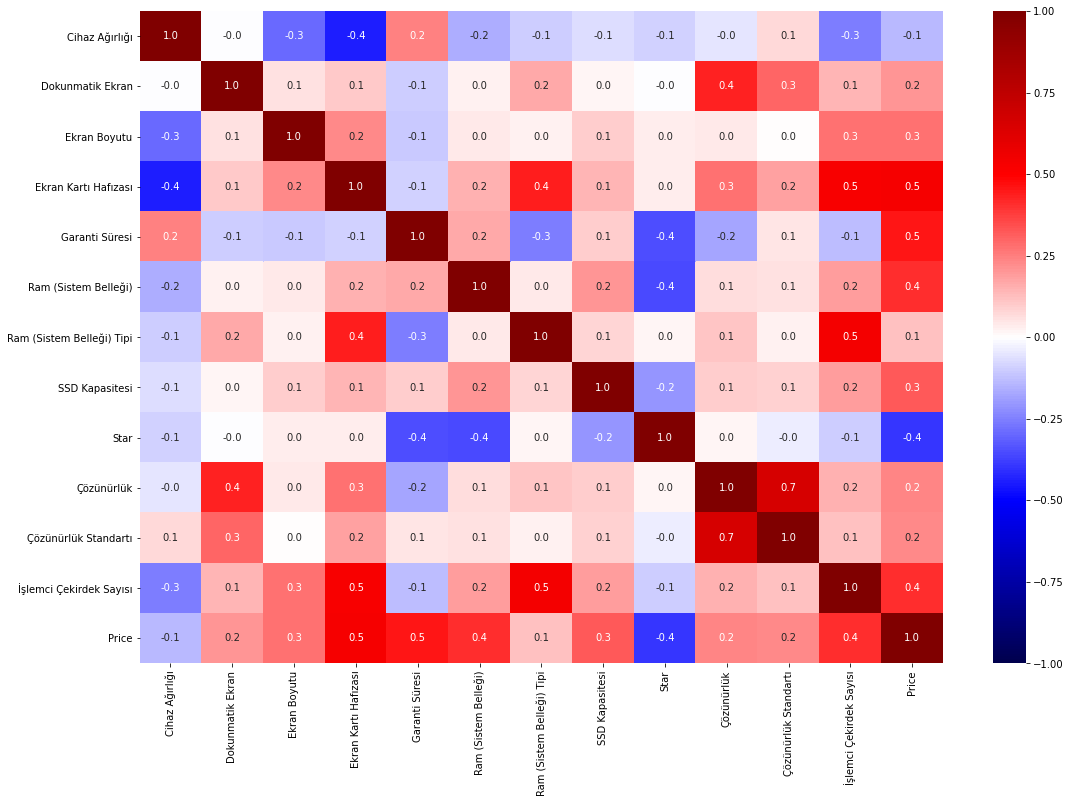

In [142]:
plt.figure(figsize=[18,12])
sns.heatmap(new_df[["Cihaz Ağırlığı","Dokunmatik Ekran","Ekran Boyutu","Ekran Kartı Hafızası","Garanti Süresi",
                    "Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi","SSD Kapasitesi","Star","Çözünürlük",
                    "Çözünürlük Standartı","İşlemci Çekirdek Sayısı","Price"]].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f');

In [141]:
new_df[new_df.columns[16:]]

,Brand_ASUS,Brand_Apple,Brand_Dell,Brand_HP,Brand_LENOVO,Brand_MSI,Ekran Kartı_AMD R7 250,Ekran Kartı_AMD Radeon 520,Ekran Kartı_AMD Radeon Graphics,Ekran Kartı_AMD Radeon Pro 5300M,...,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_Intel Xeon W Serisi,İşlemci Tipi_M2,İşletim Sistemi_Free Dos,İşletim Sistemi_Mac Os,İşletim Sistemi_Windows,İşletim Sistemi_Windows 11,Price_Log
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,9.628430
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,10.064989
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.940735
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9.654962
10,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,9.795345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,10.308919
4614,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,10.308919
4615,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,10.308919
4616,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,10.308919


In [144]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X3 = new_df.drop(["Price","Ekran Kartı Tipi","Ekran Yenileme Hızı","Title"],axis=1)
y3 = new_df.Price

# Train/Test Ayrımı
X3_train, x3_test, Y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x3_train, x3_val, y3_train, y3_val = train_test_split(X3_train, Y3_train, test_size=0.25, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression

# Modeli Oluşturma
lreg = LinearRegression()

lreg.fit(X3_train,Y3_train)

pred = lreg.predict(x3_test)

# MSE Hesabı
mse = np.mean((pred - y3_test)**2)
print("MSE: ", mse)

# R2 Skor
print("R2 Score: ", lreg.score(x3_test, y3_test))

MSE:  7952743.152542414
R2 Score:  0.9793426432058321


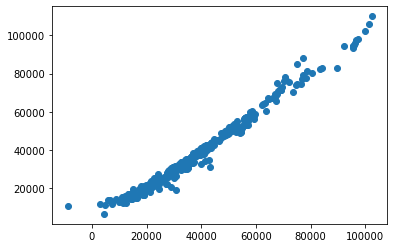

In [148]:
plt.scatter(pred,y3_test)